In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random as r

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_validate

In [2]:
df = pd.read_csv('data.csv')
df.loc[df.diagnosis == 'M', 'target'] = 0
df.loc[df.diagnosis == 'B', 'target'] = 1
df = df.drop(['diagnosis', 'id'], axis = 1)
df.head()
df.shape

(569, 31)

<AxesSubplot:>

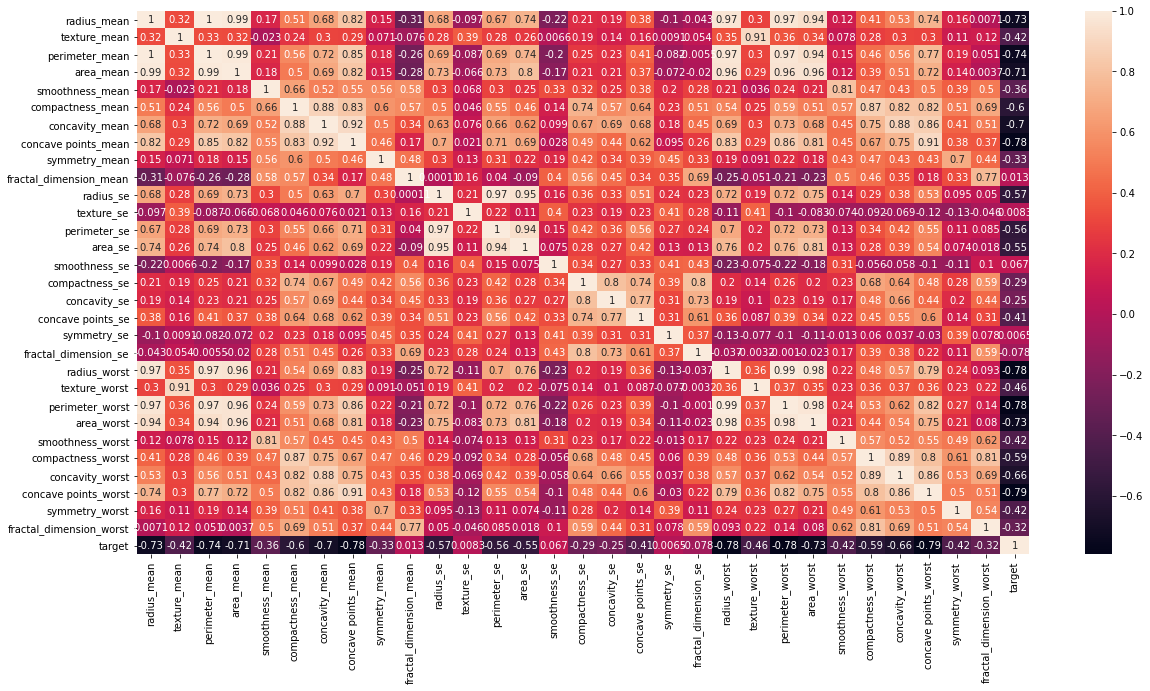

In [3]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [ ]:
sns.pairplot(df, hue='target', vars=['radius_mean',
                                     'texture_mean',
                                     'perimeter_mean',
                                     'area_mean',
                                     'smoothness_mean',
                                     'compactness_mean',
                                     'concavity_mean',
                                     'concave points_mean',
                                     'symmetry_mean',
                                     'fractal_dimension_mean',])

In [ ]:
y=df['target']
X=df.iloc[:,:-1]
X.boxplot(figsize=(20,5),rot=90)


In [ ]:
scaler = MinMaxScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), index = X.index, columns = X.columns)
scaled_X.boxplot(figsize = (20,5), rot=90)

In [ ]:
def print_score(name, y_test, pred):

    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print(name)
    accuracy.append(accuracy_score(y_test, pred) * 100)
    recall.append(recall_score(y_test, pred) * 100)
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    conmat = confusion_matrix(y_test, pred)
    val = np.mat(conmat) 
    classnames = list(set(y_test))
    df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('CLassification Model Results')
    plt.show()    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=7)
scaler = StandardScaler()
print(X_train.shape)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)


In [ ]:
svm = SVC(kernel='poly', 
          degree=2, 
          gamma='auto', 
          coef0=1, 
          C=5)

log_reg = LogisticRegression(C = 0.01,
                             penalty = 'l2', 
                             solver = 'liblinear')

ran_for = RandomForestClassifier()

knn = KNeighborsClassifier()

gau_nb = GaussianNB()

kmeans = KMeans(n_clusters=2)

In [ ]:
def kmeans_diagnostic():
    predicted_actual_comparison=pd.DataFrame(kmeans.predict(X_train))
    predicted_actual_comparison=predicted_actual_comparison.rename(columns = {0:'cluster_diagnosis'}) 
    predicted_actual_comparison['diagnosis']=y_train.to_numpy()

    cluster_type_prediction=predicted_actual_comparison.groupby(['cluster_diagnosis'])['diagnosis'].agg(lambda x:x.value_counts().index[0]).to_frame()
    print(cluster_type_prediction)

    prediction_on_test=pd.DataFrame(kmeans.predict(X_train))
    prediction_on_test=prediction_on_test.rename(columns={0:"test_prediction"})

    prediction_correction={"test_prediction":{0:cluster_type_prediction['diagnosis'][0], 1:cluster_type_prediction['diagnosis'][1]}}
    prediction_on_test=prediction_on_test.replace(prediction_correction)
    return prediction_on_test

In [ ]:
models = [
            ('K-Means', kmeans),
            ('Logistic Regression', log_reg), 
            ('Random Forest', ran_for),
            ('KNN', knn),
            ('Support Vector Machines', svm), 
            ('Gaussian NB', gau_nb),
]
global accuracy
accuracy = []
global recall
recall = []
for name, model in models:
    if name == 'K-Means':
        kmeans = KMeans(n_clusters=2).fit(X_train)
        pred = kmeans_diagnostic()

        print_score(name, y_train.to_numpy(), pred.to_numpy())

    else:
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print_score(name, y_test.to_numpy(), y_pred)
print('acc', accuracy)
print('recall',recall)


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['K-Means' ,'LogReg', 'Random Forest', 'KNN', 'SVM','Gaussian NB']
low = min(accuracy)
high = max(accuracy)
plt.ylim([m.ceil(low-0.5*(high-low)), m.ceil(high+0.5*(high-low))])
ax.bar(langs,accuracy)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['K-Means' ,'LogReg', 'Random Forest', 'KNN', 'SVM','Gaussian NB']
low = min(recall)
high = max(recall)
plt.ylim([m.ceil(low-0.5*(high-low)), m.ceil(high+0.5*(high-low))])
ax.bar(langs, recall)
plt.show()

In [ ]:
#Plot a line graph
plt.figure(figsize=(8, 6), dpi=80)
x = [0.1,0.2,0.3,0.4,0.5]
plt.plot(x,[94.53125, 93.84615384615384, 93.71859296482413, 95.30791788856305, 95.4225352112676], label='K-Means')
plt.plot(x,[96.49122807017544, 93.85964912280701, 95.90643274853801, 94.73684210526315, 92.98245614035088], label='Logistic Regression')
plt.plot(x,[98.24561403508771, 93.85964912280701, 93.56725146198829, 92.54385964912281,91.22807017543859], label='Random Forest')
plt.plot(x,[89.47368421052632, 88.59649122807018, 92.98245614035088, 93.42105263157895, 92.28070175438596], label='KNN')
plt.plot(x,[96.49122807017544, 94.73684210526315, 94.73684210526315, 94.2982456140351, 94.38596491228071], label='Support Vector Machines')
plt.plot(x,[96.49122807017544, 92.10526315789474, 92.98245614035088, 93.85964912280701, 91.22807017543859], label='Support Vector Machines')

# Add labels and title
plt.title("Accuracy Vs Test size")
plt.xlabel("Test size")
plt.ylabel("Accuracy")
 
plt.legend()
plt.show()

In [ ]:
#Plot a line graph
plt.figure(figsize=(8, 6), dpi=80)
x = [0.1,0.2,0.3,0.4,0.5]
plt.plot(x,[ 99.69040248 , 99.64912281 , 98.79518072 ,100.        , 100.        ], label='K-Means')
plt.plot(x,[100.         ,100.         ,100.         , 99.32432432 , 98.35164835], label='Logistic Regression')
plt.plot(x,[100.        ,  98.61111111,  95.37037037 , 92.56756757,  93.40659341], label='Random Forest')
plt.plot(x,[100.        ,  98.61111111 , 99.07407407 , 97.97297297,  97.25274725], label='KNN')
plt.plot(x,[100.        , 100.         , 98.14814815 , 94.59459459 , 95.6043956 ], label='Support Vector Machines')
plt.plot(x,[ 97.05882353 , 95.83333333 , 96.2962963  , 96.62162162 , 94.50549451], label='Support Vector Machines')

# Add labels and title
plt.title("Recall Vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Recall")
# plt.set_xticklabels(["one", "two", "three", "four"])
 
plt.legend()
plt.show()